# Theorical Chip shape and thickness during wood peripheral planning

The present script describes the estimation  

Description


### Parametric equations:


####  Wavelengths or feed per knife (mm)

$$O= \frac {A}{Z * N}$$ 
Where: 
$A$: feed speed (m/min),
$Z$: number of knives on cutterhead,
$N$: rotational speed (rpm)

#### Cutting depth (mm)

$$h = \frac{O^2} {8 (R + \frac{O * Z}{\pi})}$$
Where: 
$O$: feed speed (m/min),
$Z$: number of knives on cutterhead,
$R$: radius of cutter (mm)

#### Average chip thickness (mm)

$$a_{av} = \frac {f}{N * Z} \sqrt {\frac {h}{D}}$$
where:
$a_{av}$: average chip thickness,
$f$: feed speed (m/min),
$N$: rotational speed (rpm),
$Z$: number of knives on cutterhead,
$h$: cutting depth (mm),
$D$: diameter of cutting circle (mm),

#### Theorical chip shape (according to Martelloti 1941)

Description: dfgpsdfgdfsgdjfgpsdfg
sdfgsdfgdsfg


$$X = r \alpha + R \sin (\alpha)$$
$$Y = R (1 - \cos \alpha)$$

where: 
$X$: path of the cutting tool tooth in X coordinate, 
$Y$: path of the cutting tool tooth in Y coordinate,
$\alpha$: angle through which the cutter and pinion have rotated in the cutting direction from the starting point which is the origin of the coordinate system XY,
$r$: the pitch radius of the pinion
$R$: radius of cutter (mm)



![alt text](figure1.jpg "Martellotti")
Martellotti ME (1941) An analysis of the milling process.Transactions Am Soc Mech Engineers 63:677-700

Profondeur de passe (mm) :1.5
Longueur onde usinage (mm) :2.8
Rayon outil de coupe (mm) :40.4
Vitesse de rotation (RPM) :3600
Nombre de couteaux :1
Epaisseur moyenne du copeau (mm):  0.38150302024419874
largeur de l'onde d'usinage (mm):  2.8
hauteur de l'onde d'usinage (mm):  1.5
[ 0.          0.02769999  0.05539995  0.08309982  0.11079957  0.13849916
  0.16619855  0.19389769  0.22159655  0.24929509  0.27699327  0.30469104
  0.33238836  0.36008521  0.38778152  0.41547728  0.44317242  0.47086692
  0.49856073  0.52625382  0.55394613  0.58163764  0.60932831  0.63701808
  0.66470692  0.69239479  0.72008166  0.74776747  0.7754522   0.80313579
  0.83081821  0.85849942  0.88617937  0.91385804  0.94153537  0.96921133
  0.99688587  1.02455896  1.05223056  1.07990062  1.1075691   1.13523597
  1.16290118  1.1905647   1.21822648  1.24588649  1.27354467  1.301201
  1.32885543  1.35650793  1.38415844  1.41180693  1.43945337  1.4670977
  1.4947399   1.52237991  1.5500177   1.57765324  1.60528647  1.6

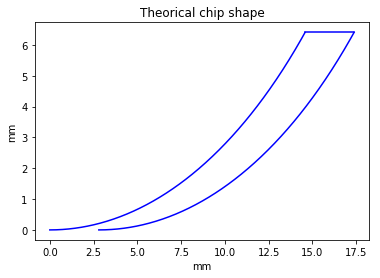

In [12]:
#Modules
############################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
############################################################


#Data inputs
#############################################################
ap=input('Profondeur de passe (mm) :') # aqui es h
ap = float(ap)

o=input('Longueur onde usinage (mm) :') #ft
o = float(o)

r=input('Rayon outil de coupe (mm) :')
r = float(r)

n=input('Vitesse de rotation (RPM) :')
n=float(n)

z=input('Nombre de couteaux :')
z=float(z)


# vf = input('vitesse d'alimentation) 

#ap=1.5
#ap = float(ap)

#o=2.8
#o = float(o)

#r=40
#r = float(r)

rp = 12.7 #rayon du pignon de maintien du porte outil (ici 1po)

#############################################################


#Data equations
#############################################################
#vitesse d'alimentation

vf = o * z * n
epmoy=(vf / (n*z)) * ((ap / (r*2))** (1/2)) #epaisseur moyenne de copeux



#Angle effectué par le couteau pendant l'usinage du copeau 
ra = np.cos((r-ap)/r) 

#Balayage du couteau de 0 à ra
t = np.arange(0, ra, 0.001)
t = -1*t

# Chip width equation
X=(rp * t)- (r * np.sin(t))
Y=r * (1-np.cos(t)) 
XO = X + o

debx = rp * -ra - r * np.sin(-ra)
deby = r * (1 - np.cos(-ra))

finx = (rp * -ra - r * np.sin(-ra)) + o
finy = r * (1 - np.cos(-ra))

a = [debx, finx]
b = [deby, finy]

#Plotting chip formation
#############################################################
plt.plot(X, Y, 'b') #same line width and color
plt.plot(XO, Y,  'b') #same line width and color
plt.plot(a,b, 'b')  # union of points

plt.xlabel('mm') #show label in x position 
plt.ylabel('mm') #show label in x position
plt.title('Theorical chip shape')#show title Forme théorique du copeau
#plt.legend() #show leyend
#text(11,1.9,{'Epaisseur moyenne du copeau=',epmoy}) #falta!!!
#plt.text(10.0, 0.0,"Epaisseur moyenne du copeau=")

print("Epaisseur moyenne du copeau (mm): ",epmoy)
print("largeur de l'onde d'usinage (mm): ", o)
print("hauteur de l'onde d'usinage (mm): ", ap)

#example: un porte-outil muni de 16 couteaux rectifiés présente un cylindre de coupe de onze pouces de diametre
#il tourne è 3450 tr/min et travaille en opposition è une vitesse d'alimentation de 1000pi/min
#Calculer:
# - Avance par dent ou largeur de l'onde par le couteau
# - hauteur de l'onde d'usinage